<a href="https://colab.research.google.com/github/priyanshusingh-collab/Fashion-MNIST/blob/main/Fashion_MNIST_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt

Load the Fashion MNIST dataset

In [2]:
fashiondata = tf.keras.datasets.fashion_mnist
(train_image,train_label),(test_image,test_label) = fashiondata.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Normalize the pixel values

In [3]:
train_image = train_image/255.0
test_image = test_image/255.0

Visualization of training examples

LABEL: 9

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

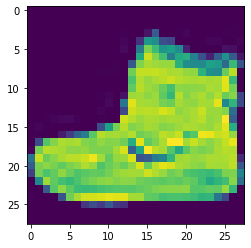

In [4]:
# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {train_label[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_image[index]}')

# Visualize the image
plt.imshow(train_image[index])

Define the model

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')])

Print the model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

Setup training parameters

In [7]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

Training the model


In [8]:
history = model.fit(train_image,train_label,epochs = 50,validation_data  = (test_image,test_label))

Epoch 1/50
1875/1875 [==============================] - 17s 4ms/step - loss: 0.7890 - accuracy: 0.7101 - val_loss: 0.5625 - val_accuracy: 0.7978
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5349 - accuracy: 0.8066 - val_loss: 0.4838 - val_accuracy: 0.8268
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4628 - accuracy: 0.8340 - val_loss: 0.4135 - val_accuracy: 0.8484
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4209 - accuracy: 0.8505 - val_loss: 0.4106 - val_accuracy: 0.8484
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3899 - accuracy: 0.8581 - val_loss: 0.3708 - val_accuracy: 0.8637
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3672 - accuracy: 0.8662 - val_loss: 0.3691 - val_accuracy: 0.8712
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3475 - accuracy: 0.8754 - val_loss: 0.3566 - val_accuracy

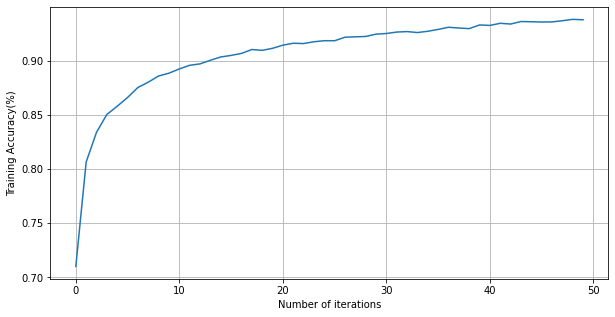

In [9]:
plt.figure(figsize = (10,5))
plt.plot(history.history['accuracy'])
plt.xlabel('Number of iterations')
plt.ylabel('Training Accuracy(%)')
plt.grid()
plt.show()

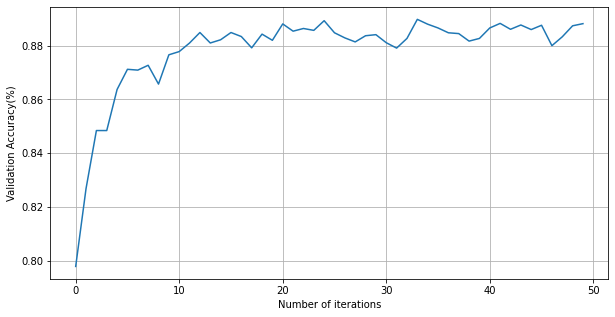

In [10]:
plt.figure(figsize = (10,5))
plt.plot(history.history['val_accuracy'])
plt.xlabel('Number of iterations')
plt.ylabel('Validation Accuracy(%)')
plt.grid()
plt.show()

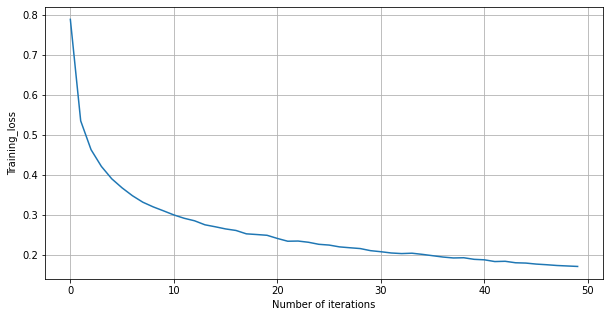

In [11]:
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.xlabel('Number of iterations')
plt.ylabel('Training_loss')
plt.grid()
plt.show()

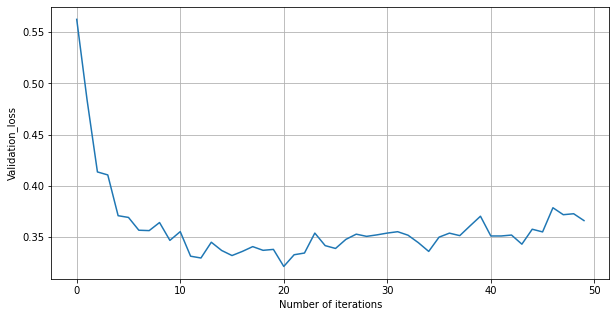

In [12]:
plt.figure(figsize = (10,5))
plt.plot(history.history['val_loss'])
plt.xlabel('Number of iterations')
plt.ylabel('Validation_loss')
plt.grid()
plt.show()